In [2]:
import pandas as pd

heart = pd.read_csv('heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


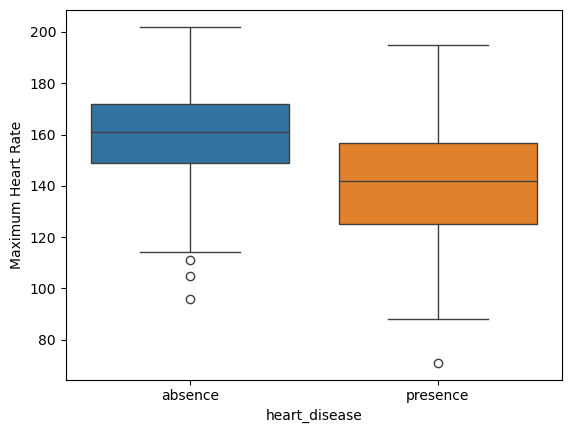

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.boxplot(x=heart['heart_disease'], y=heart['thalach'], hue=heart['heart_disease'])
plt.ylabel('Maximum Heart Rate')
plt.show()

In [18]:
thalach_hd = heart[heart['heart_disease'] == 'presence']['thalach']
thalach_no_hd = heart[heart['heart_disease'] == 'absence']['thalach']

In [21]:
print(thalach_hd.mean() - thalach_no_hd.mean())
print(thalach_hd.median() - thalach_no_hd.median())

-19.11905597473242
-19.0


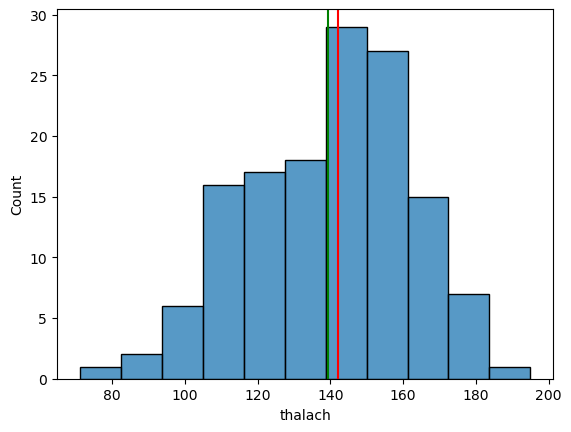

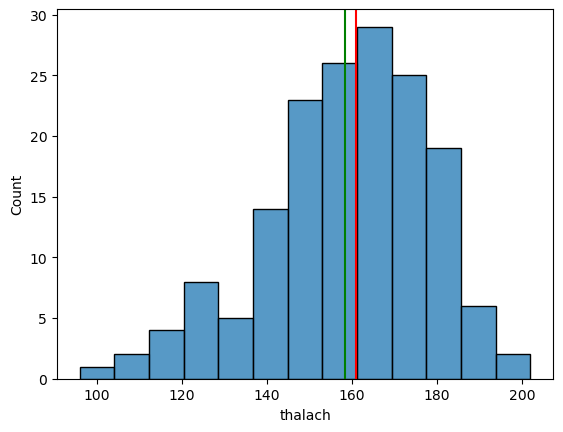

<Figure size 640x480 with 0 Axes>

In [49]:
sns.histplot(x=thalach_hd)
plt.axvline(x=thalach_hd.median(), color='red')
plt.axvline(x=thalach_hd.mean(), color='green')
plt.show()
sns.histplot(x=thalach_no_hd)
plt.axvline(x=thalach_no_hd.median(), color='red')
plt.axvline(x=thalach_no_hd.mean(), color='green')
plt.show()

plt.clf()

In [63]:
from scipy.stats import ttest_ind, f_oneway, chi2_contingency

pval = ttest_ind(a=thalach_hd, b=thalach_no_hd, alternative='two-sided').pvalue
print(pval)

if abs(pval) <= 0.025:
    print('Reject null hypothesis')
else:
    print('Do not reject null hypothesis')

3.456964908430172e-14
Reject null hypothesis


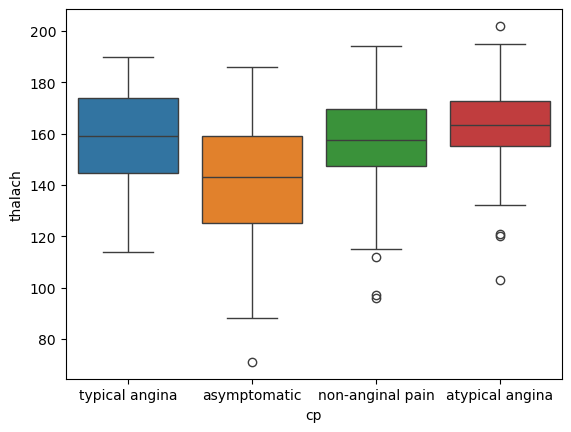

<Figure size 640x480 with 0 Axes>

In [64]:
sns.boxplot(x=heart['cp'], y=heart['thalach'], hue=heart['cp'])
plt.show()
plt.clf()

In [65]:
thalach_typical = heart[heart['cp'] == 'typical angina']['thalach']
thalach_asymptom = heart[heart['cp'] == 'asymptomatic']['thalach']
thalach_nonangin = heart[heart['cp'] == 'non-anginal pain']['thalach']
thalach_atypical = heart[heart['cp'] == 'atypical angina']['thalach']

In [66]:
pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical).pvalue
print(pval)

if abs(pval) <= 0.05:
    print('Reject null hypothesis')
else:
    print('Do not reject null hypothesis')

1.9065505247705008e-10
Reject null hypothesis


In [67]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog=heart['thalach'], groups=heart['cp']))

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


In [68]:
xtab = pd.crosstab(heart['cp'], heart['heart_disease'])
xtab

heart_disease,absence,presence
cp,,
asymptomatic,39,105
atypical angina,41,9
non-anginal pain,68,18
typical angina,16,7


In [76]:
pval = chi2_contingency(xtab).pvalue
print(pval)
if abs(pval) <= 0.05:
    print('Reject null hypothesis')
else:
    print('Do not reject null hypothesis')

1.2517106007837527e-17
Reject null hypothesis
